In [1]:
import pandas as pd
import numpy as np

In [8]:
df=pd.read_excel("Desktop/sets/toyota_cars.xls")
df

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,GT86,2016,16000,Manual,24089,Petrol,265,36.2,2.0
1,GT86,2017,15995,Manual,18615,Petrol,145,36.2,2.0
2,GT86,2015,13998,Manual,27469,Petrol,265,36.2,2.0
3,GT86,2017,18998,Manual,14736,Petrol,150,36.2,2.0
4,GT86,2017,17498,Manual,36284,Petrol,145,36.2,2.0
...,...,...,...,...,...,...,...,...,...
6733,IQ,2011,5500,Automatic,30000,Petrol,20,58.9,1.0
6734,Urban Cruiser,2011,4985,Manual,36154,Petrol,125,50.4,1.3
6735,Urban Cruiser,2012,4995,Manual,46000,Diesel,125,57.6,1.4
6736,Urban Cruiser,2011,3995,Manual,60700,Petrol,125,50.4,1.3


In [9]:
df.describe()

,year,price,mileage,tax,mpg,engineSize
count,6738.000000,6738.000000,6738.000000,6738.000000,6738.000000,6738.000000
mean,2016.748145,12522.391066,22857.413921,94.697240,63.042223,1.471297
std,2.204062,6345.017587,19125.464147,73.880776,15.836710,0.436159
min,1998.000000,850.000000,2.000000,0.000000,2.800000,0.000000
25%,2016.000000,8290.000000,9446.000000,0.000000,55.400000,1.000000
50%,2017.000000,10795.000000,18513.000000,135.000000,62.800000,1.500000
75%,2018.000000,14995.000000,31063.750000,145.000000,69.000000,1.800000
max,2020.000000,59995.000000,174419.000000,565.000000,235.000000,4.500000


In [13]:
# Count of the number of cars for each year
yearly_distribution = df['year'].value_counts()
yearly_distribution = yearly_distribution.sort_index()
yearly_distribution

year
1998       1
1999       1
2000       1
2001       1
2002       4
2003       6
2004       7
2005      12
2006      11
2007      20
2008      19
2009      29
2010      18
2011      40
2012      42
2013     204
2014     352
2015     525
2016     997
2017    2019
2018    1015
2019    1286
2020     128
Name: count, dtype: int64

In [14]:
price_summary = df['price'].describe()
price_summary

count     6738.000000
mean     12522.391066
std       6345.017587
min        850.000000
25%       8290.000000
50%      10795.000000
75%      14995.000000
max      59995.000000
Name: price, dtype: float64

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns

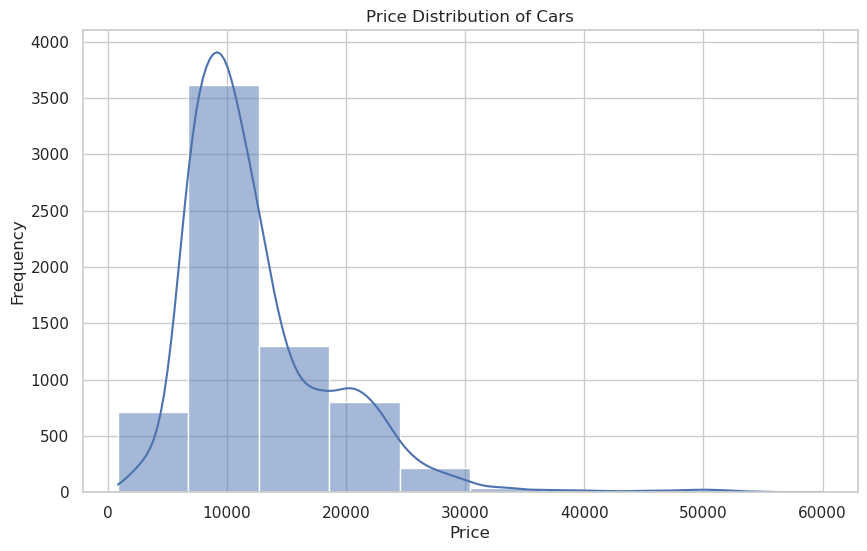

In [35]:

# histogram of the price distribution
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.histplot(df['price'], bins=10, kde=True)
plt.title('Price Distribution of Cars')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

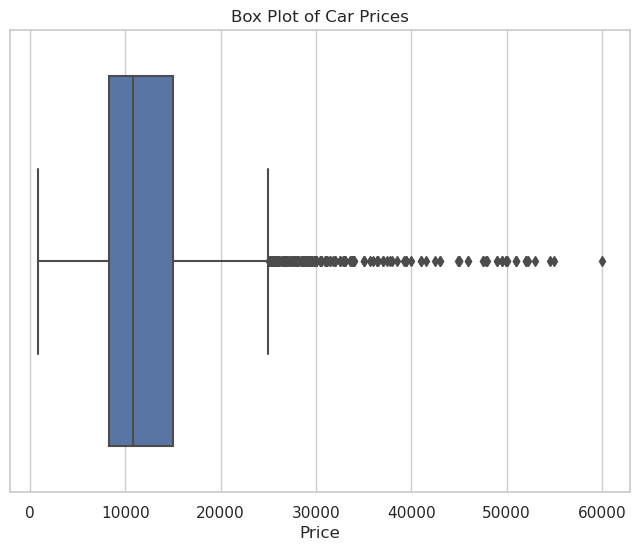

In [36]:
#a box plot to visualize the price distribution and detect outliers
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['price'])
plt.title('Box Plot of Car Prices')
plt.xlabel('Price')
plt.show()

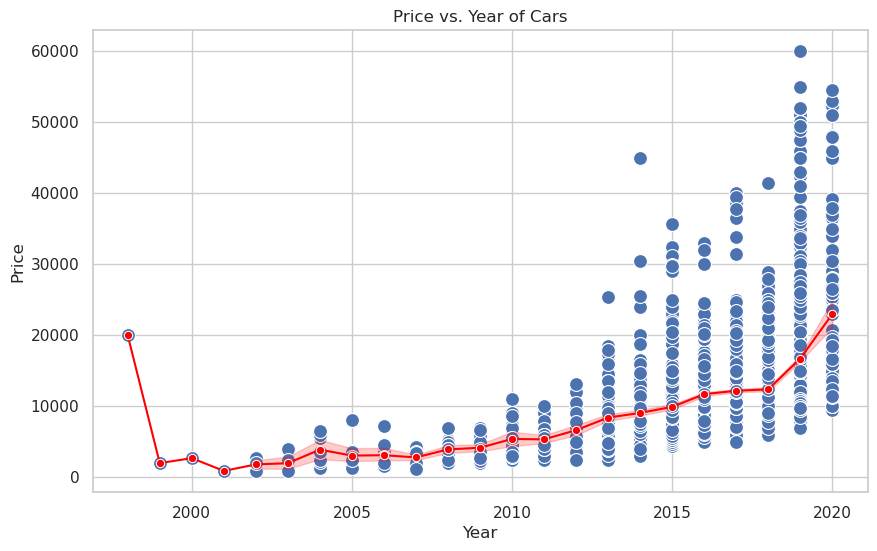

In [37]:
# Create a scatter plot
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.scatterplot(x='year', y='price', data=df, marker='o', s=100)

# Add a line plot to show the trend
sns.lineplot(x='year', y='price', data=df, color='red', marker='o')

# Set the plot title and labels
plt.title('Price vs. Year of Cars')
plt.xlabel('Year')
plt.ylabel('Price')
plt.show()

In [38]:
correlation = df['year'].corr(df['price'])
print(f"Correlation between Year and Price: {correlation:.2f}")

Correlation between Year and Price: 0.42


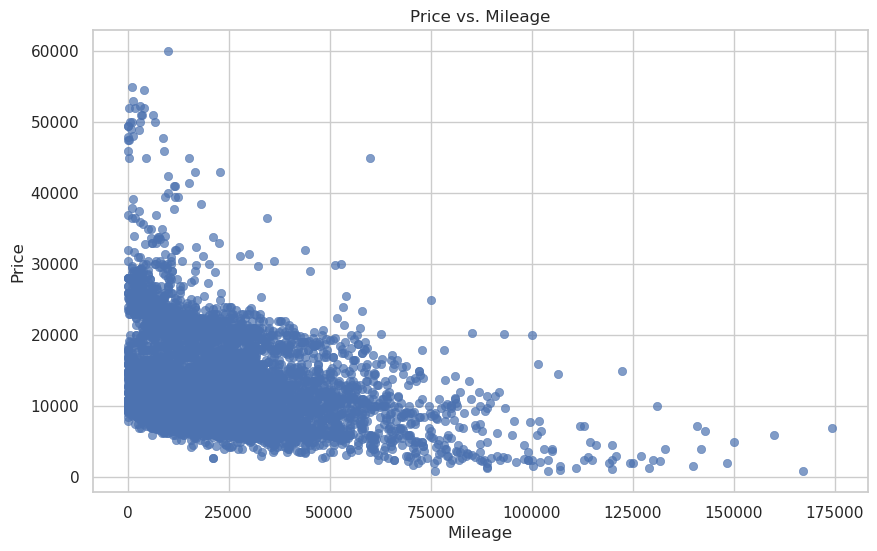

In [39]:
# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Create a scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='mileage', y='price', alpha=0.7, edgecolor=None)

# Add labels and title
plt.title('Price vs. Mileage')
plt.xlabel('Mileage')
plt.ylabel('Price')

# Show the plot
plt.show()

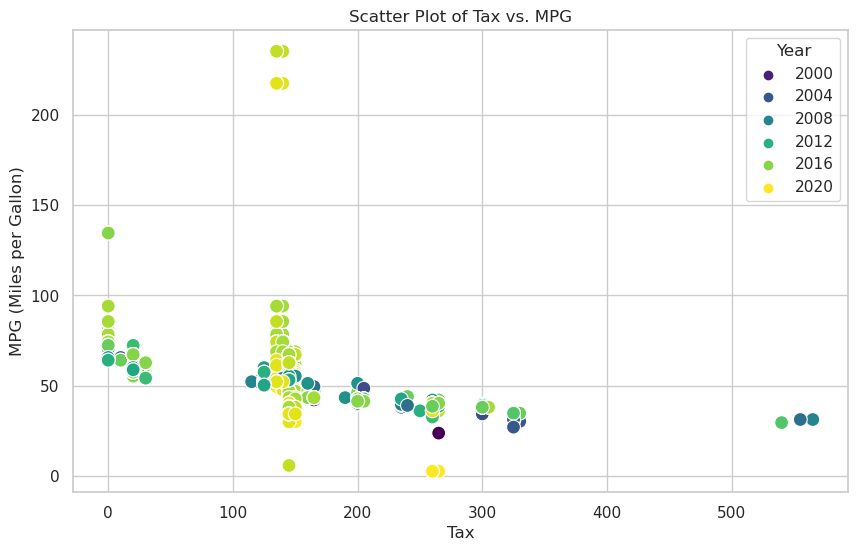

In [40]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='tax', y='mpg', hue='year', palette='viridis', s=100)
plt.title('Scatter Plot of Tax vs. MPG')
plt.xlabel('Tax')
plt.ylabel('MPG (Miles per Gallon)')
plt.legend(title='Year')
plt.grid(True)
plt.show()


In [41]:
# Calculate the correlation coefficient
correlation = df[['tax', 'mpg']].corr().iloc[0, 1]
print(f'Correlation coefficient between tax and MPG: {correlation:.2f}')


Correlation coefficient between tax and MPG: -0.43


In [42]:
# Calculate average price, mileage, and tax by year
average_features = df.groupby('year').agg({
    'price': 'mean',
    'mileage': 'mean',
    'tax': 'mean'
}).reset_index()

# Print the averages
print(average_features)




    year         price        mileage         tax
0   1998  19990.000000  100000.000000  265.000000
1   1999   1995.000000   89000.000000  160.000000
2   2000   2695.000000   21000.000000  160.000000
3   2001    899.000000   76000.000000  300.000000
4   2002   1811.000000   84197.000000  222.500000
5   2003   1984.166667  105751.666667  236.666667
6   2004   3893.571429   99889.857143  283.571429
7   2005   3054.416667   92641.833333  194.583333
8   2006   3109.454545   86774.272727  209.090909
9   2007   2797.500000   79386.200000  179.500000
10  2008   3926.210526   84719.157895  180.789474
11  2009   4160.413793   70039.103448   72.758621
12  2010   5397.500000   64173.833333   55.833333
13  2011   5341.425000   63553.275000   82.500000
14  2012   6634.595238   53738.023810  101.309524
15  2013   8404.656863   45820.887255   67.745098
16  2014   9065.571023   40706.750000   46.818182
17  2015   9909.577143   34763.360000   34.200000
18  2016  11704.079238   28057.120361   26.499498


Text(0, 0.5, 'Average Price')

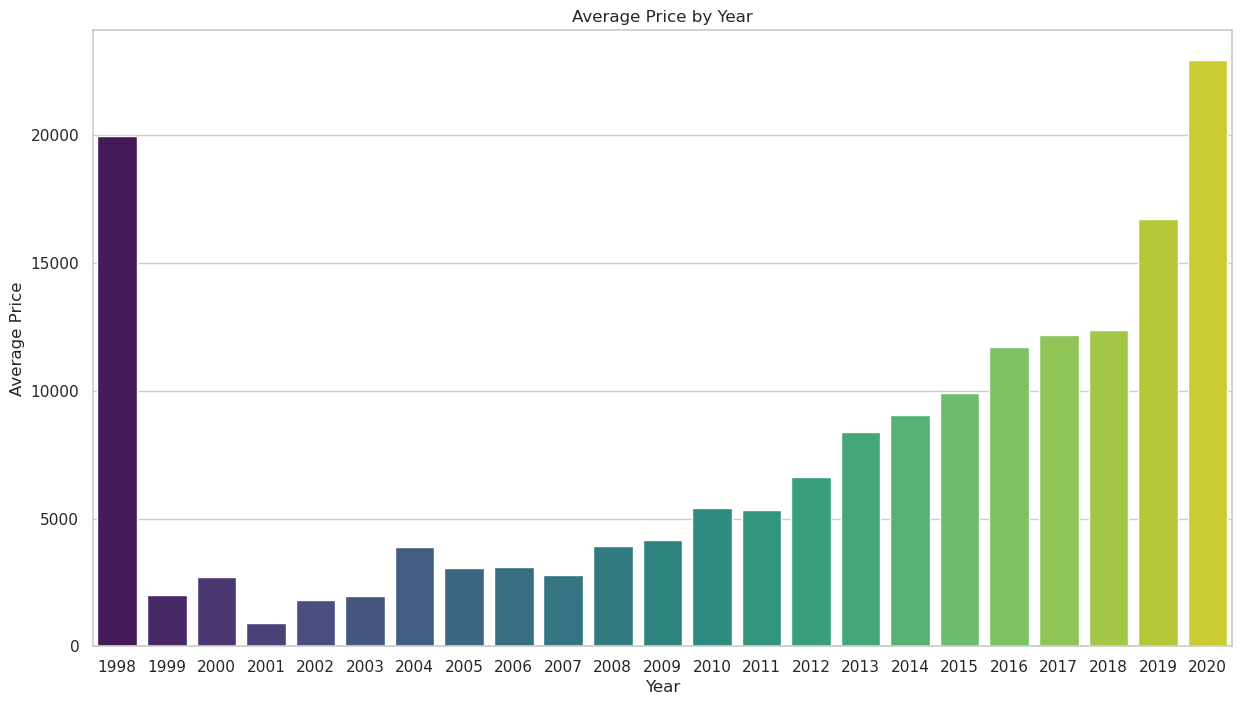

In [49]:
# Plot with increased figure size
plt.figure(figsize=(50, 8)) 

# Plot the average price by year
plt.subplot(1, 3, 1)
sns.barplot(data=average_features, x='year', y='price', palette='viridis')
plt.title('Average Price by Year')
plt.xlabel('Year')
plt.ylabel('Average Price')

Text(0, 0.5, 'Average Mileage')

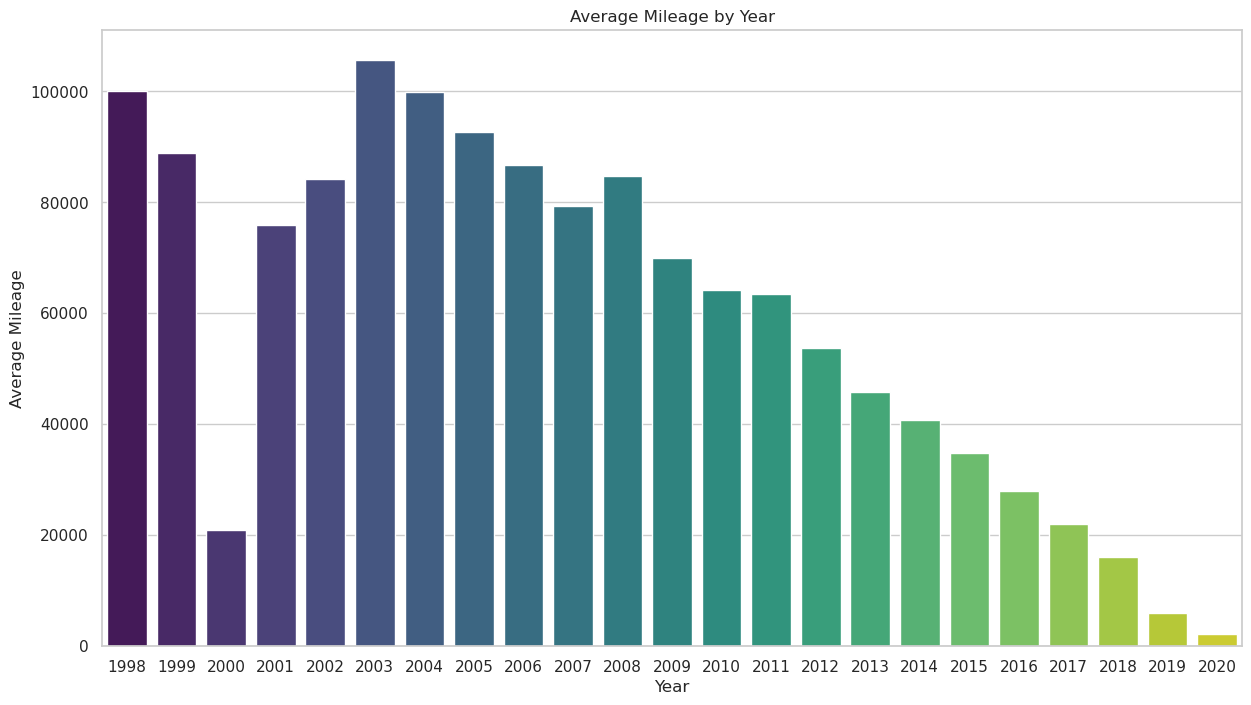

In [53]:
plt.figure(figsize=(50, 8)) 
# Plot the average mileage by year
plt.subplot(1, 3, 2)
sns.barplot(data=average_features, x='year', y='mileage', palette='viridis')
plt.title('Average Mileage by Year')
plt.xlabel('Year')
plt.ylabel('Average Mileage')


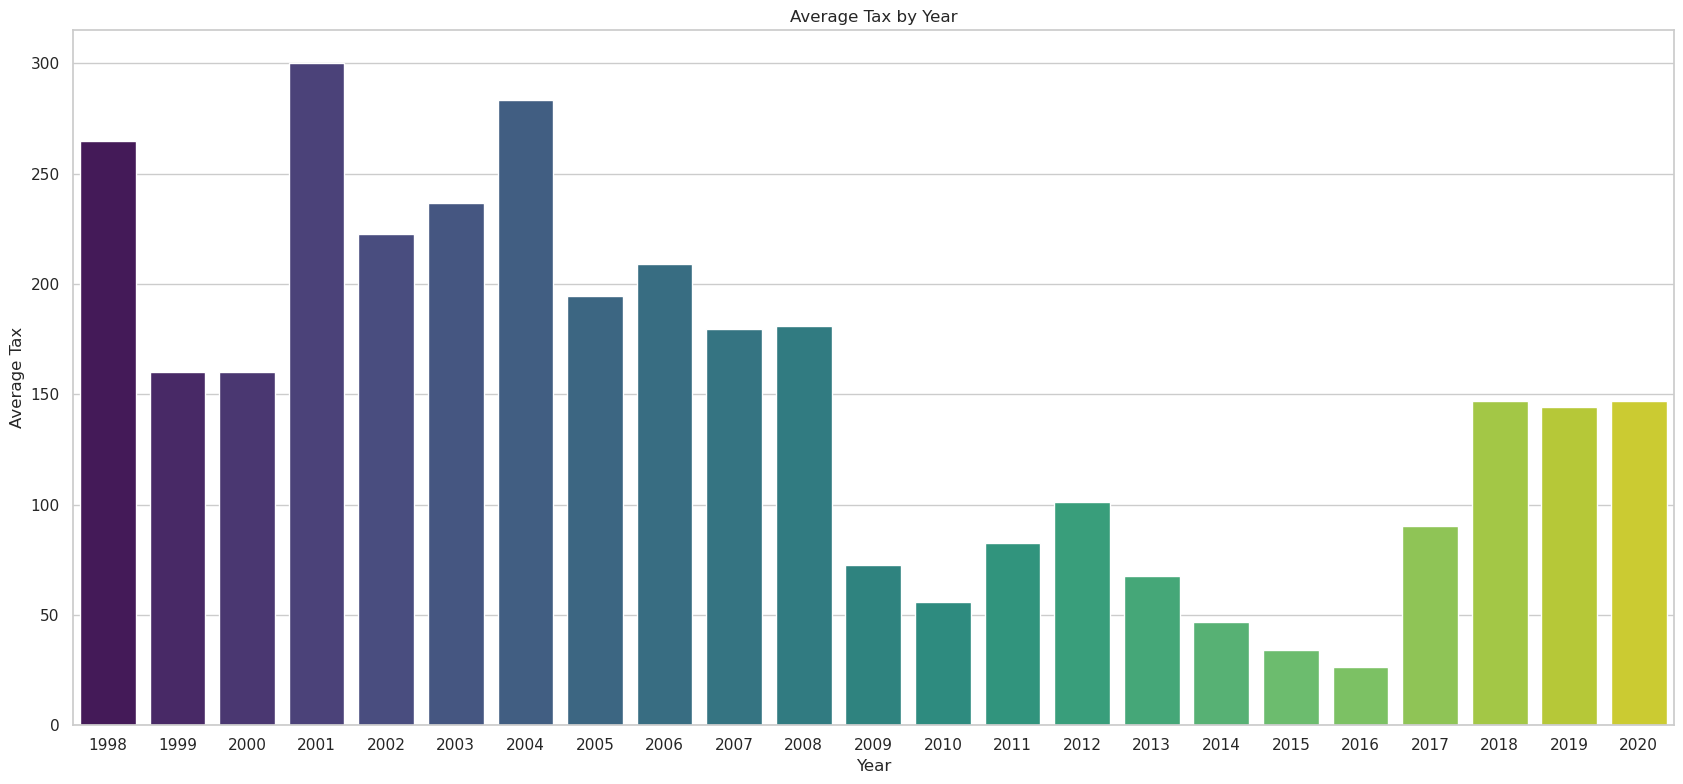

In [54]:
plt.figure(figsize=(50, 8)) 
# Plot the average tax by year
plt.subplot(1, 3, 3)
sns.barplot(data=average_features, x='year', y='tax', palette='viridis')
plt.title('Average Tax by Year')
plt.xlabel('Year')
plt.ylabel('Average Tax')

plt.tight_layout()
plt.show()

In [56]:
# Calculate average price, mileage, tax, and mpg by fuel type
average_features_by_fuel = df.groupby('fuelType').agg({
    'price': 'mean',
    'mileage': 'mean',
    'tax': 'mean',
    'mpg': 'mean'
}).reset_index()

# Print the averages
print(average_features_by_fuel)

  fuelType         price       mileage         tax        mpg
0   Diesel  15697.807157  41742.294235  149.174950  52.066799
1   Hybrid  17185.472834  24452.267744   60.127264  75.282183
2    Other  14121.161905  17159.904762  100.523810  71.184762
3   Petrol   9759.537803  19882.336188  105.123563  58.065329


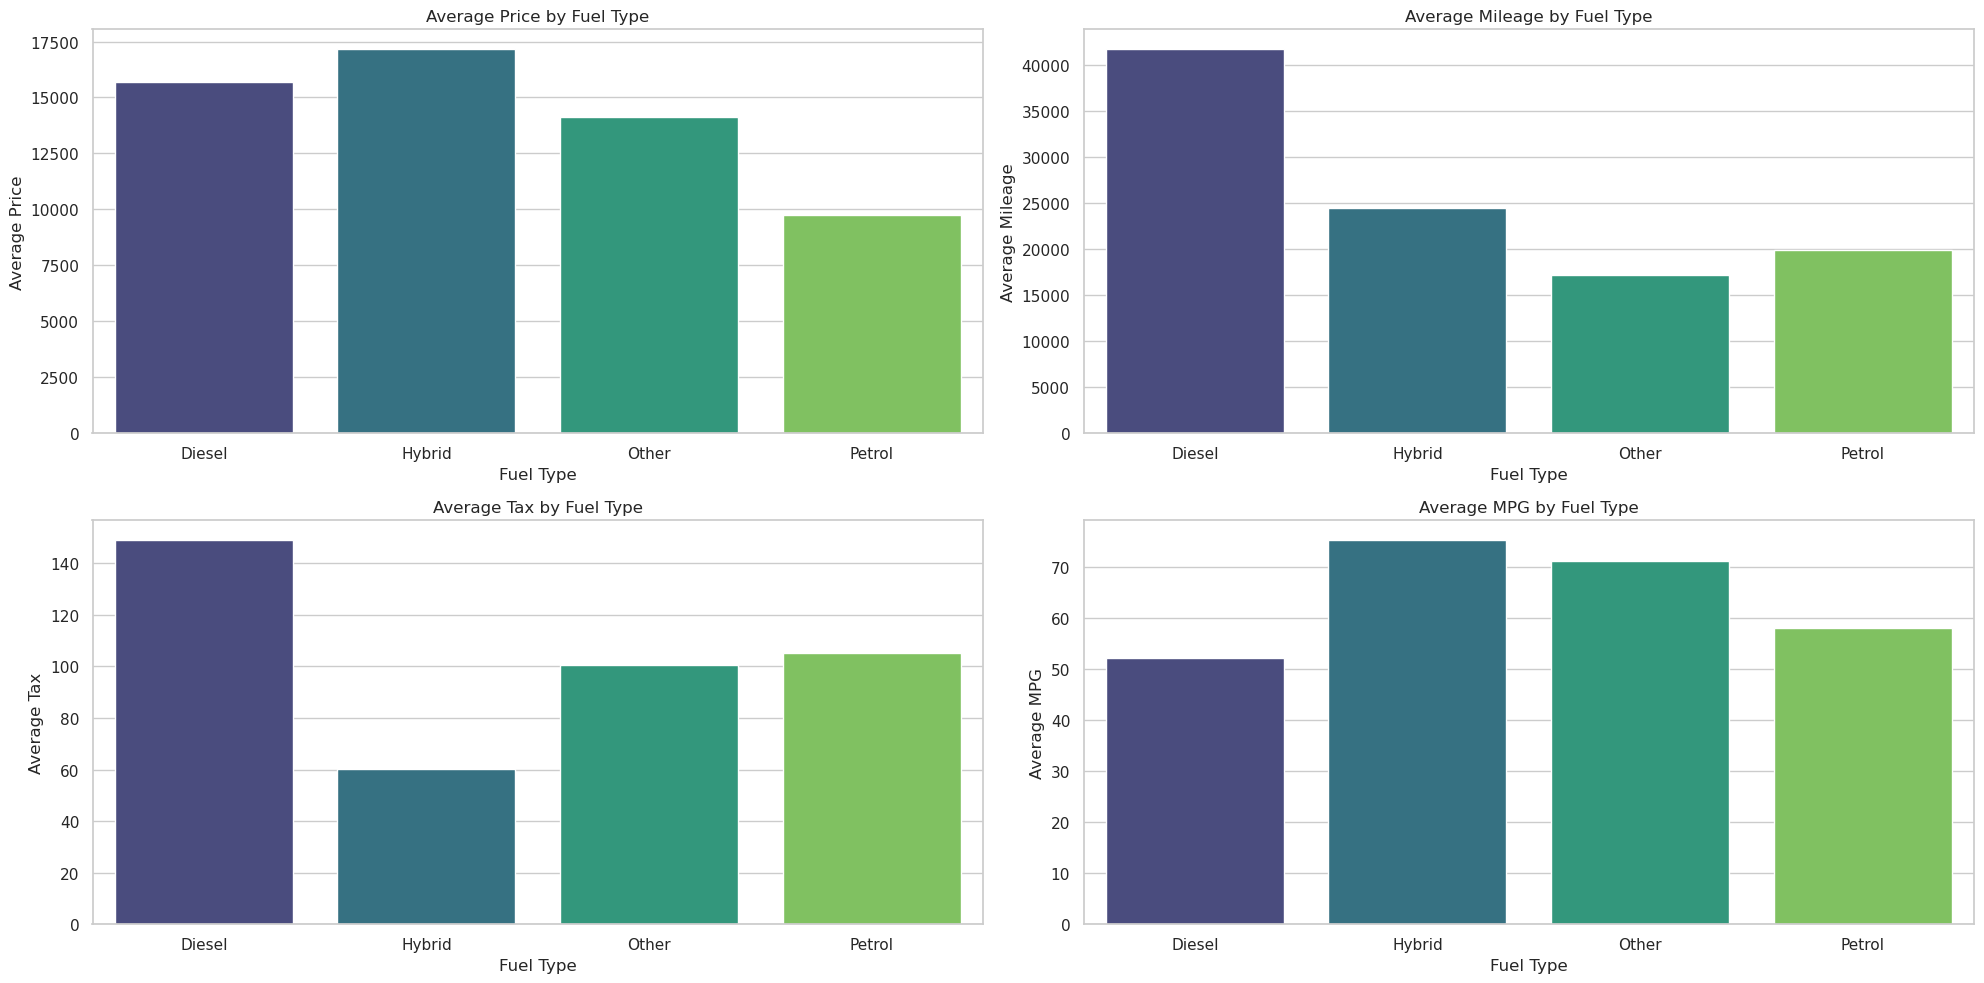

In [57]:
plt.figure(figsize=(20, 10))

# Plot average price by fuel type
plt.subplot(2, 2, 1)
sns.barplot(data=average_features_by_fuel, x='fuelType', y='price', palette='viridis')
plt.title('Average Price by Fuel Type')
plt.xlabel('Fuel Type')
plt.ylabel('Average Price')

# Plot average mileage by fuel type
plt.subplot(2, 2, 2)
sns.barplot(data=average_features_by_fuel, x='fuelType', y='mileage', palette='viridis')
plt.title('Average Mileage by Fuel Type')
plt.xlabel('Fuel Type')
plt.ylabel('Average Mileage')

# Plot average tax by fuel type
plt.subplot(2, 2, 3)
sns.barplot(data=average_features_by_fuel, x='fuelType', y='tax', palette='viridis')
plt.title('Average Tax by Fuel Type')
plt.xlabel('Fuel Type')
plt.ylabel('Average Tax')

# Plot average mpg by fuel type
plt.subplot(2, 2, 4)
sns.barplot(data=average_features_by_fuel, x='fuelType', y='mpg', palette='viridis')
plt.title('Average MPG by Fuel Type')
plt.xlabel('Fuel Type')
plt.ylabel('Average MPG')

plt.tight_layout()
plt.show()


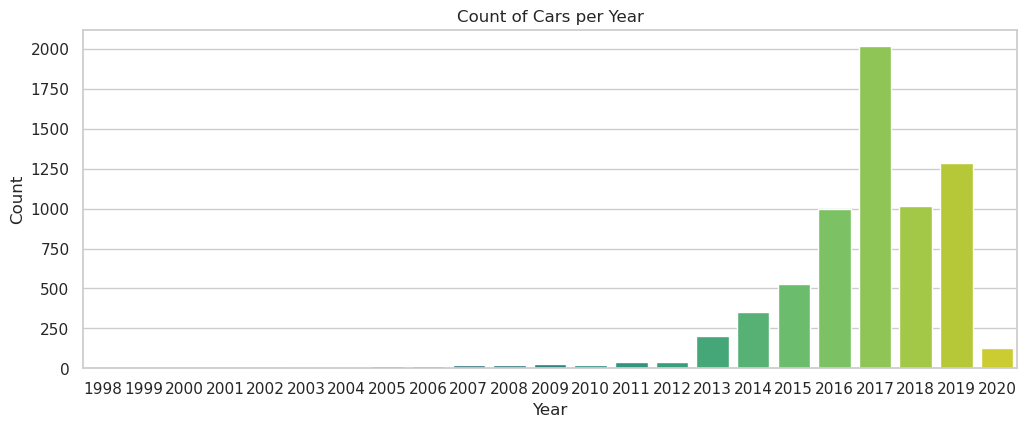

In [62]:
# Bar Chart: Count of Cars per Year
plt.figure(figsize=(20, 8)) 
plt.subplot(2, 2, 4)
sns.countplot(data=df, x='year', palette='viridis')
plt.title('Count of Cars per Year')
plt.xlabel('Year')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

Text(0, 0.5, 'Average Price')

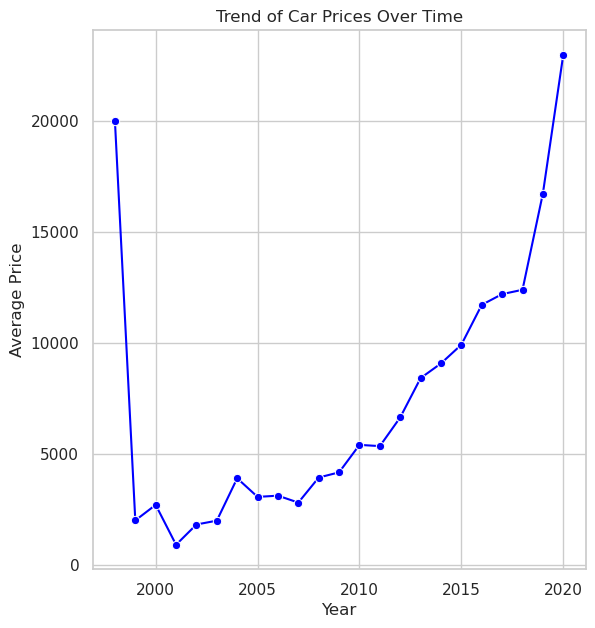

In [64]:
# Calculate average price and mileage by year
average_trends = df.groupby('year').agg({
    'price': 'mean',
    'mileage': 'mean'
}).reset_index()

# Plot trends over time
plt.figure(figsize=(14, 7))

# Line Plot for Car Prices Over Time
plt.subplot(1, 2, 1)
sns.lineplot(data=average_trends, x='year', y='price', marker='o', color='blue')
plt.title('Trend of Car Prices Over Time')
plt.xlabel('Year')
plt.ylabel('Average Price')



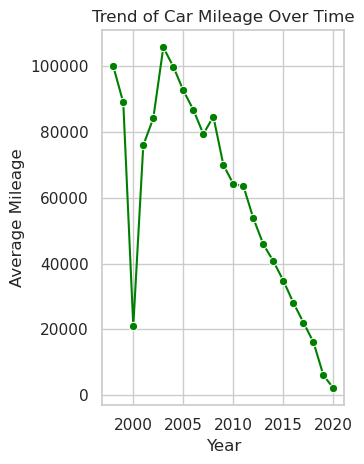

In [65]:
# Line Plot for Car Mileage Over Time
plt.subplot(1, 2, 2)
sns.lineplot(data=average_trends, x='year', y='mileage', marker='o', color='green')
plt.title('Trend of Car Mileage Over Time')
plt.xlabel('Year')
plt.ylabel('Average Mileage')

plt.tight_layout()
plt.show()

Text(0, 0.5, 'Price')

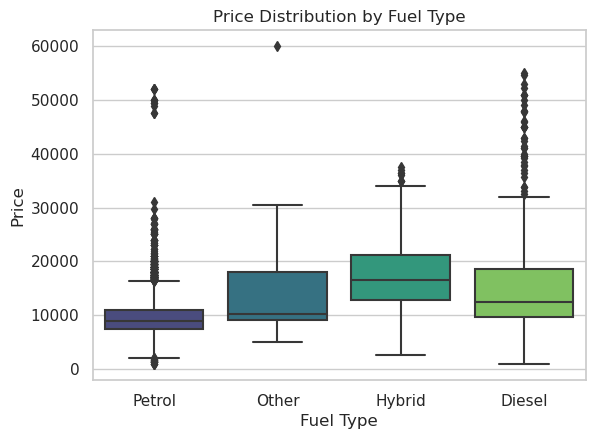

In [66]:
plt.figure(figsize=(14, 10))

# Box Plot: Price by Fuel Type
plt.subplot(2, 2, 1)
sns.boxplot(data=df, x='fuelType', y='price', palette='viridis')
plt.title('Price Distribution by Fuel Type')
plt.xlabel('Fuel Type')
plt.ylabel('Price')

Text(0, 0.5, 'Mileage')

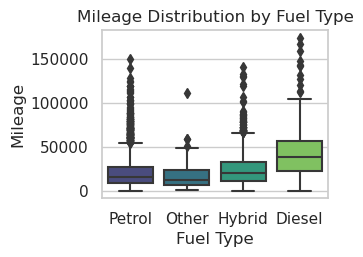

In [67]:
plt.subplot(2, 2, 2)
sns.boxplot(data=df, x='fuelType', y='mileage', palette='viridis')
plt.title('Mileage Distribution by Fuel Type')
plt.xlabel('Fuel Type')
plt.ylabel('Mileage')

Text(0, 0.5, 'Price')

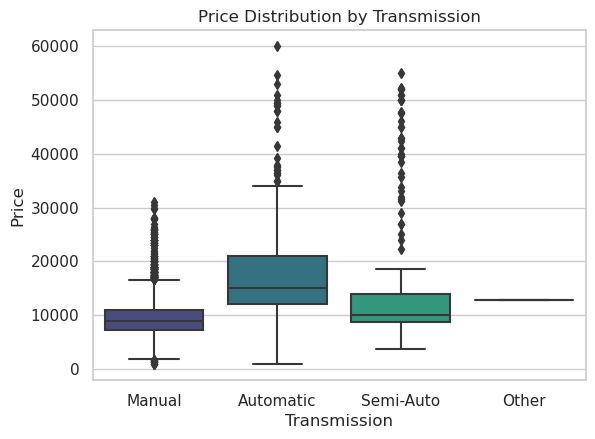

In [69]:
plt.figure(figsize=(14, 10))
plt.subplot(2, 2, 3)
sns.boxplot(data=df, x='transmission', y='price', palette='viridis')
plt.title('Price Distribution by Transmission')
plt.xlabel('Transmission')
plt.ylabel('Price')

Text(0, 0.5, 'Mileage')

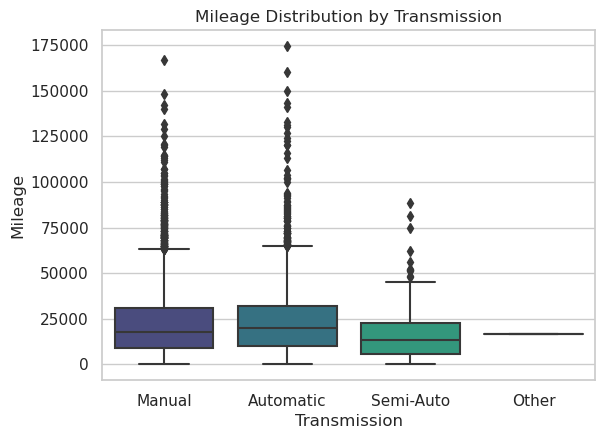

In [71]:
# Box Plot: Mileage by Transmission
plt.figure(figsize=(14, 10))
plt.subplot(2, 2, 4)
sns.boxplot(data=df, x='transmission', y='mileage', palette='viridis')
plt.title('Mileage Distribution by Transmission')
plt.xlabel('Transmission')
plt.ylabel('Mileage')
